In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.graph_objects as go

In [2]:
data_store_sales = pd.read_csv('C:/Users/camil/Documents/DataAnalytics/CSVs/Different_stores_dataset.csv')

In [3]:
data_store_sales.head()

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall
0,I138884,10/30/2016 9:58,C241288,Female,28,Clothing,5,1500.40,1425.380,Credit Card,South,Kentucky,Kanyon
1,I317333,10/30/2016 9:58,C111565,Male,21,Shoes,3,1800.51,1620.459,Debit Card,South,Kentucky,Viaport Outlet
2,I127801,10/30/2016 9:58,C266599,Male,20,Clothing,1,300.08,295.060,Cash,West,California,Metrocity
3,I173702,10/30/2016 9:58,C988172,Female,66,Shoes,5,3000.85,2900.765,Credit Card,South,Florida,Metropol AVM
4,I337046,10/30/2016 9:59,C189076,Female,53,Books,4,60.60,45.450,Cash,South,Florida,Kanyon


In [4]:
data_store_sales.tail()

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall
99452,I219422,11/15/2016 12:43,C441542,Female,45,Souvenir,5,58.65,43.9875,Credit Card,South,Alabama,Kanyon
99453,I325143,11/15/2016 12:43,C569580,Male,27,Food & Beverage,2,10.46,7.3220,Cash,South,Alabama,Viaport Outlet
99454,I824010,11/15/2016 12:44,C103292,Male,63,Food & Beverage,2,10.46,7.3220,Debit Card,South,Alabama,Metrocity
99455,I702964,11/15/2016 12:44,C800631,Male,56,Technology,4,4200.00,3780.0000,Cash,South,Georgia,Istinye Park
99456,I232867,11/15/2016 12:44,C273973,Female,36,Souvenir,3,35.19,24.6330,Credit Card,South,Georgia,Mall of Istanbul


In [5]:
data_store_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   invoice_no              99457 non-null  object 
 1   invoice_date            99457 non-null  object 
 2   customer_id             99457 non-null  object 
 3   gender                  99457 non-null  object 
 4   age                     99457 non-null  int64  
 5   category                99457 non-null  object 
 6   quantity                99457 non-null  int64  
 7   selling_price_per_unit  99457 non-null  float64
 8   cost_price_per_unit     99457 non-null  float64
 9   payment_method          99457 non-null  object 
 10  region                  99457 non-null  object 
 11  state                   99457 non-null  object 
 12  shopping_mall           99457 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 9.9+ MB


In [6]:
data_store_sales.describe()

,age,quantity,selling_price_per_unit,cost_price_per_unit
count,99457.000000,99457.000000,99457.000000,99457.000000
mean,43.427089,3.004424,689.256321,605.113854
std,14.990054,1.415237,941.184567,858.838256
min,18.000000,1.000000,5.230000,3.661000
25%,30.000000,2.000000,45.450000,31.815000
50%,43.000000,3.000000,203.300000,162.640000
75%,56.000000,4.000000,1200.320000,1080.306000
max,69.000000,15.000000,5250.000000,4725.000000


In [7]:
data_store_sales.duplicated().sum()

0

In [8]:
data_store_sales.isna().sum()

invoice_no                0
invoice_date              0
customer_id               0
gender                    0
age                       0
category                  0
quantity                  0
selling_price_per_unit    0
cost_price_per_unit       0
payment_method            0
region                    0
state                     0
shopping_mall             0
dtype: int64

In [9]:
data_category_quantity = data_store_sales.groupby('category')[['quantity']].sum().reset_index()
data_category_quantity_order = data_category_quantity.sort_values(by='quantity')
data_category_quantity_order

,category,quantity
5,Souvenir,14871
0,Books,14989
6,Technology,15033
4,Shoes,30217
7,Toys,30321
3,Food & Beverage,44281
2,Cosmetics,45501
1,Clothing,103598


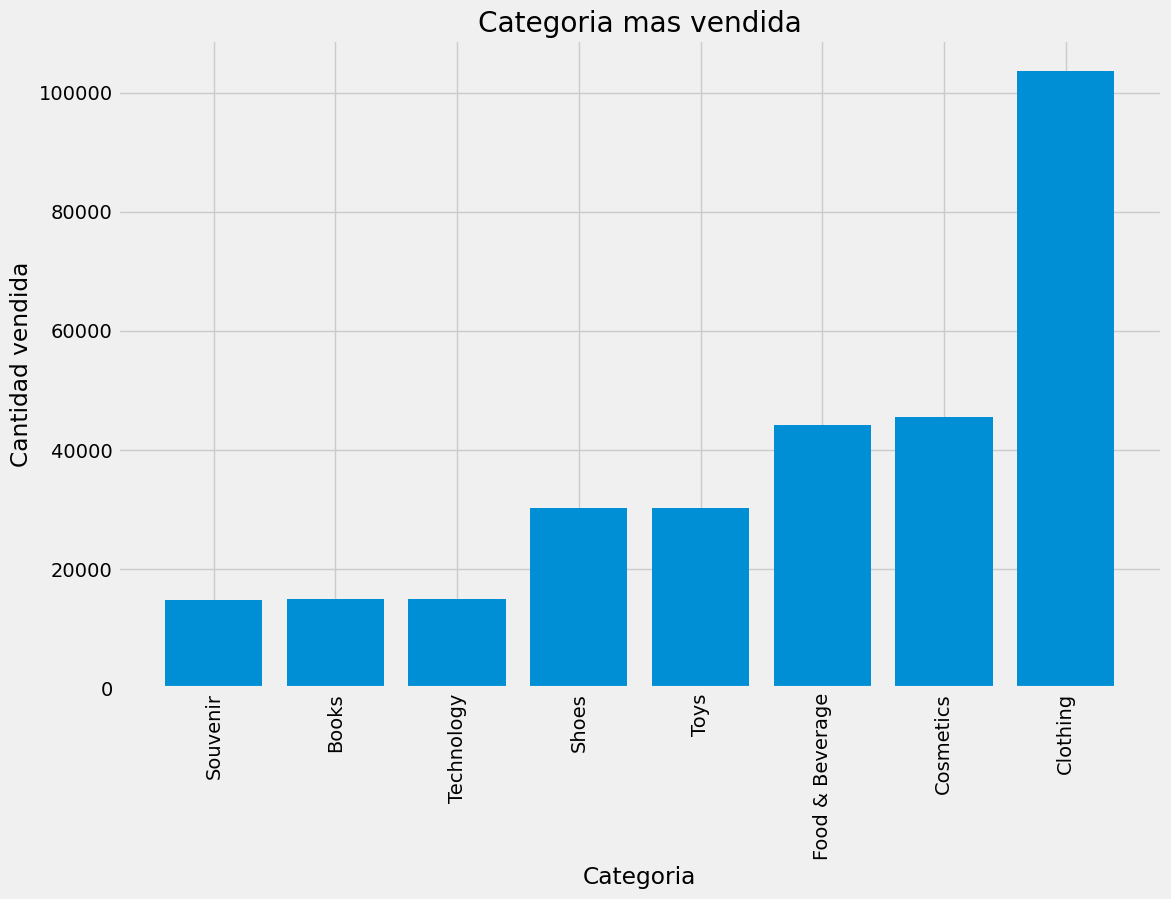

In [10]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))
plt.bar('category','quantity',
        data=data_category_quantity_order)
plt.xticks(rotation=90)
plt.title('Categoria mas vendida')
plt.xlabel('Categoria')
plt.ylabel('Cantidad vendida')
plt.show()

In [11]:
data_gender_paymethod = data_store_sales.groupby(['gender','payment_method'])[['quantity']].sum().reset_index()
data_gender_paymethod.sort_values(by='quantity')

,gender,payment_method,quantity
5,Male,Debit Card,24427
2,Female,Debit Card,35879
4,Male,Credit Card,41784
3,Male,Cash,53895
1,Female,Credit Card,63312
0,Female,Cash,79514


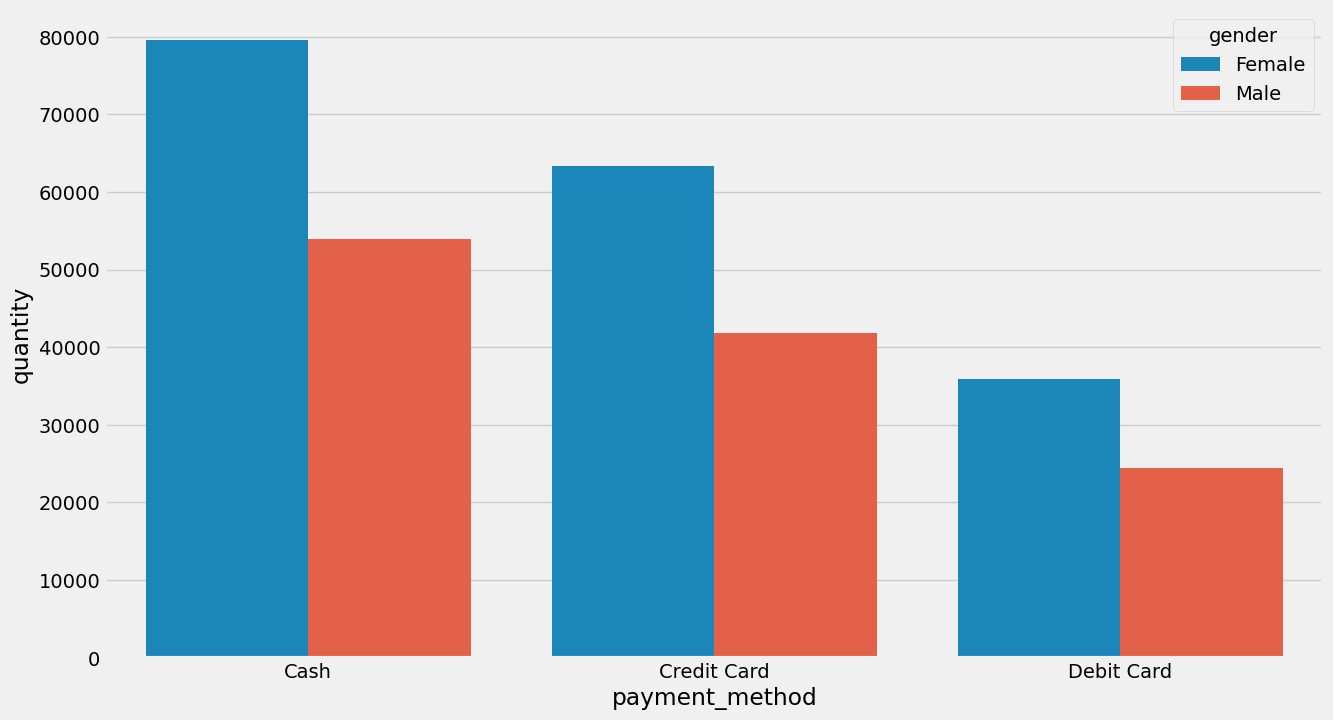

In [12]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(14,8))
sns.barplot(data=data_gender_paymethod, x='payment_method', y='quantity',hue='gender')
plt.show()

In [13]:
data_gender_paymethod_category = data_store_sales.groupby(['payment_method','category'])[['quantity']].sum().reset_index()
data_gender_paymethod_category.sort_values(by=['payment_method','quantity'])

,payment_method,category,quantity
5,Cash,Souvenir,6486
6,Cash,Technology,6720
0,Cash,Books,6831
4,Cash,Shoes,13492
7,Cash,Toys,13745
3,Cash,Food & Beverage,19623
2,Cash,Cosmetics,19953
1,Cash,Clothing,46559
8,Credit Card,Books,5069
13,Credit Card,Souvenir,5318


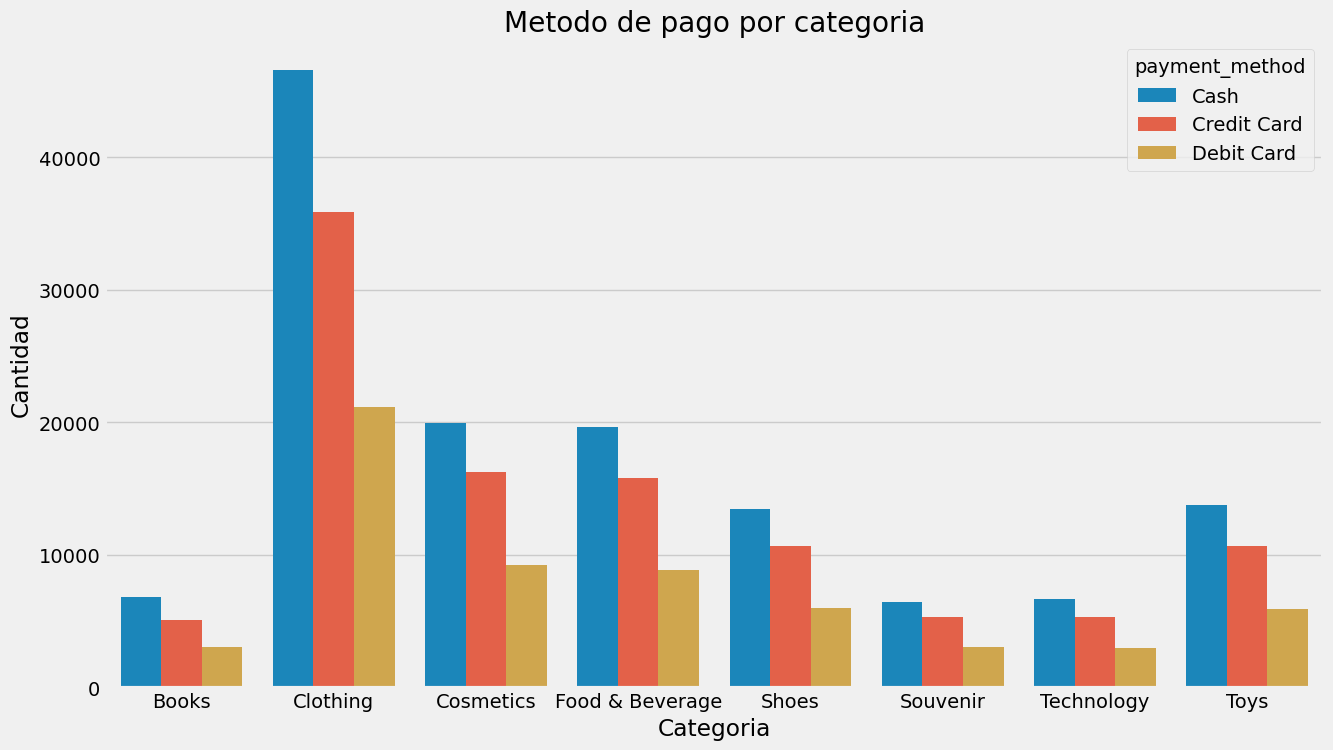

In [14]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(14,8))
sns.barplot(data=data_gender_paymethod_category, x='category', y='quantity',hue='payment_method')
plt.title('Metodo de pago por categoria')
plt.xlabel('Categoria')
plt.ylabel('Cantidad')
plt.show()

In [19]:
data_mall_seller = data_store_sales.groupby('shopping_mall')[['quantity']].sum()
data_mall_seller.sort_values(by='quantity')

,quantity
shopping_mall,
Metropol AVM,30530
Zorlu Center,30619
Viaport Outlet,30631
Istinye Park,44452
Metrocity,44894
Mall of Istanbul,58197
Kanyon,59488


In [29]:
fig = go.Figure(data=[go.Pie(labels=data_mall_seller.index, values=data_mall_seller.values.flatten(), hole=0.4)])
fig.update_layout(title='Ventas por Shopping con porcentaje ')
fig.show()
